In [2]:
from matfusion_jax.vis import IPythonReport, display_image, display_svbrdf
from matfusion_jax.model import Model
from matfusion_jax.nprast import nprast_animated_render

In [3]:
import imageio.v3 as iio
import cv2
import numpy as np
import jax
from pathlib import Path

# Model Loading

In [4]:
model = Model.from_checkpoint('./checkpoints/flash_v1_jax/')

# Input Loading

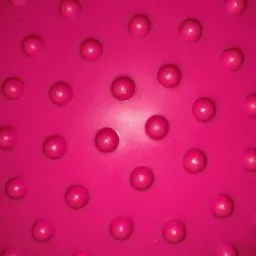

In [5]:
# TODO: pick your own image
image = iio.imread('./demo/pink_input.png')
image = cv2.resize(image, (256, 256))
image = np.expand_dims(image / 255.0, 0)
image = image ** 2.2
display_image(image, gamma=2.2)

# Run MatFusion

In [6]:
fov = 45 # TODO: accurate FOV can make a pretty big quality difference
distance = 1/np.tan(np.deg2rad([fov])/2)

results = model.evaluate(
    {
        'input': image,
        'flash_x': np.array([0.0]),
        'flash_y': np.array([0.0]),
        'view_distance': distance,
        'flash_distance': distance,
    },
    # TODO: you can also improve quality by selecting a good seed
    key=jax.random.PRNGKey(0),
    sampler='euler_a',
    steps=20,
    animation='signal',
)

# See the Results

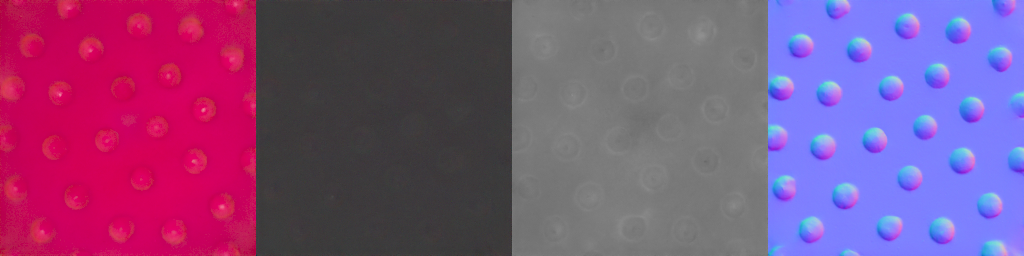

In [10]:
svbrdf_img = display_svbrdf(results['svbrdf_est'][0], horizontal=True, format='png', gamma=2.2)
Path('./demo/pink_svbrdf.png').write_bytes(svbrdf_img.data) # optional: save the svbrdf to disk
svbrdf_img

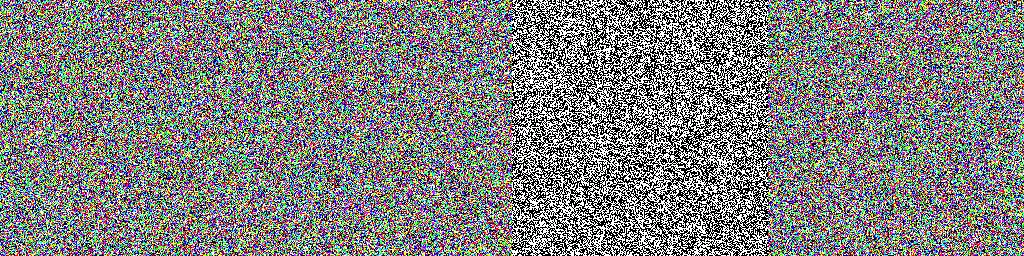

In [8]:
display_svbrdf(results['svbrdf_animation'][0], horizontal=True, gamma=2.2)

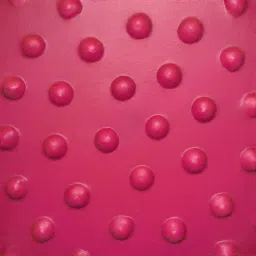

In [9]:
display_image(nprast_animated_render(results['svbrdf_est'][0]), gamma=2.2)